In [1]:
! ls Data
print('')
! ls Data/output/

1519759656_39328483.csv
2017 PMP Data Final No Duplicates.xlsx
Federal_VDC_Relation_web_clean.xlsx
Federal_VDC_Relation_web.xlsx
nepalmonitor-reports.csv
nepal_population_household_ward-2011.csv
NM_2016_17export.csv
npl_polbanda_adm5_wad_25k_sdn_wgs84.csv
output

District_Province_Population  pop_incidents_VDC.csv
NM_2016_17clean.csv	      sources_vdc.csv


In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#set up a custom qualitative color palette
xkcd_colors = ['purple','green','blue','pink','brown','red','light blue',\
              'tan','light green','magenta','yellow','sky blue','teal','orange','light purple']
catpal = sns.xkcd_palette(xkcd_colors)



#Import Main Data Frames
cleanpath='Data/output/NM_2016_17clean.csv'#clean 2017 dataset
newpath = 'Data/nepalmonitor-reports.csv'#NM latest export - new site version for hold out set
df = pd.read_csv(cleanpath)
new_df = pd.read_csv(newpath)

print(df.shape[0],'x',df.shape[1])
print(new_df.shape[0], 'x',new_df.shape[1])

6630 x 68
5127 x 55


In [3]:
# convert 'INCIDENT DATE' column to date time objects (and limit to 2017) (and 18)
df['INCIDENT DATE'] = pd.to_datetime(df.loc[:,'INCIDENT DATE'])
df.index  = df['INCIDENT DATE']
df = df['2017']

    
new_df['Event Date'] = pd.to_datetime(new_df.loc[:,'Event Date'])
new_df['Publication Date'] = pd.to_datetime(new_df.loc[:,'Publication Date'])
new_df.index = new_df['Publication Date']
#new_df = new_df['2018'] < taken out to have part of the 2017 data

print(df.shape)
print(new_df.shape)

(3541, 68)
(5127, 55)


### Match (concat?_ 2017 and 2018 data

In [4]:
drop = ['CATEGORY','Municipality/VDC(New)','Ward(New)','Ward','Crosscutting issues','Weapon 2','Actor 2 entity name',
        'Number of Deaths','Development Region','Number of Injuries','Verification Feedback',
        'Event Date - Peace Monitoring','INCIDENT NUMBER','LATITUDE','LONGITUDE',
        'VERIFIED','LOCATION','Zone','District(New)','Election-related  specific cause primary',
        'Election-related specific cause secondary','INCIDENT DATE','INCIDENT TITLE']

new_drop = ['#','Title','Nepali Title', 'Ward','Publication Date','Event Date',
            'Province','Nepali Description','Tags','Location','Latitude','Longitude']

train_df = df.dropna(axis=1, how='all')#.sort_index(axis=1)
test_df = new_df.dropna(axis=1, how='all')#.sort_index(axis=1)


train_df.drop(drop, axis=1, inplace=True)
test_df.drop(new_drop, axis=1, inplace=True)

train_df.rename(columns={'Actor 1 Entity Name': 'Actor 1 - Entity',
                         #': 'Actor 2 - Entity',
                         'Actor 1 - Perpetrator Type':'Actor 1 - Affiliation',
                         'Perpetrator 2 - if two-sided violence':'Actor 2 - Affiliation',
                         'Actor 1 - Youth -25 years or below- involvement': 'Actor 1 - Youth/non-youth',
                         'Actor 2 - Youth -25 years or below- involvement': 'Actor 2 - Youth/non-youth',
                         'Actor 2 Numbers':'Actor 2 - Number of people',
                         
                        }, inplace=True)

test_df = test_df.reindex(columns=['Description', 'HLCIT Code', 'Location Accuracy', 'District', 'Municipality/VDC',
 'Source', 'Source Type', 'Duration - only applicable to non-violent forms', 
 'Violent / Nonviolent', 'Onesided / Twosided', 'Collective / Interpersonal', 
 'Event Form - Primary', 'Event Form - Secondary', 'Weapons', 'Cause - Primary', 
 'Cause - Secondary','Actor 1 - Number of people','Actor 1 - Affiliation', 'Actor 1 - Entity', 
 'Actor 1 - Youth/non-youth', 'Actor 2 - Number of people', 'Actor 2 - Target', 'Actor 2 - Affiliation',
 'Actor 2 - Youth/non-youth', 'Total killed', 'Female killed', 'Youth killed', 'Total injured', 'Female injured',
 'Youth injured', 'Total raped', 'Female raped', 'Youth raped', 'Total abducted', 'Female abducted', 
 'Youth abducted', 'Total damaged buildings', 'Severely damaged buildings', 'Total damaged vehicles', 
 'Severely damaged vehicles'])

#train_df.sort_index(axis=1, inplace=True)
#test_df.sort_index(axis=1, inplace=True)

print(train_df.shape,test_df.shape)

for col in zip(train_df.columns,test_df.columns):
    print(col)
#print(test_df.columns)

(3541, 40) (5127, 40)
('DESCRIPTION', 'Description')
('HLCIT CODE', 'HLCIT Code')
('LOCATION ACCURACY', 'Location Accuracy')
('District', 'District')
('Municipality/VDC', 'Municipality/VDC')
('SOURCE', 'Source')
('SOURCE TYPE', 'Source Type')
('Duration - only applicable to non-violent forms', 'Duration - only applicable to non-violent forms')
('Violent vs non-violent', 'Violent / Nonviolent')
('One-sided vs two-sided', 'Onesided / Twosided')
('Collective vs interpersonal', 'Collective / Interpersonal')
('Event form - primary', 'Event Form - Primary')
('Event form - secondary', 'Event Form - Secondary')
('Weapon', 'Weapons')
('Cause - primary', 'Cause - Primary')
('Cause - secondary', 'Cause - Secondary')
('Actor 1 - Number of People', 'Actor 1 - Number of people')
('Actor 1 - Affiliation', 'Actor 1 - Affiliation')
('Actor 1 - Entity', 'Actor 1 - Entity')
('Actor 1 - Youth/non-youth', 'Actor 1 - Youth/non-youth')
('Actor 2 - Number of people', 'Actor 2 - Number of people')
('Target - i

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nhorning/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [5]:
def strip_newline(string):
    if type(string) == str:
        return string.split('\n')[0]
    else:
        return string

#train_df.columns = test_df.columns
full_df = test_df.applymap(strip_newline)
#train_df.append(test_df) < it looks like the variables are coded differently let's just use 1 dataset for now
full_df['Total killed'] = (full_df.loc[:,'Total killed'] == '1').astype(float)
full_df.head()

#full_df['Actor 1 - Affiliation'].unique()

Description  \
Publication Date                                                      
2018-11-15        People in Pushpalal Chok of Nepalgunj were ter...   
2018-11-14         The police have rescued 35 child workers from...   
2018-11-15        Police have launched an investigation after a ...   
2018-11-13        A man attacked three persons with a Khukuri—a ...   
2018-11-13        Police have arrested 54 years old ward secreta...   

                           HLCIT Code Location Accuracy   District  \
Publication Date                                                     
2018-11-15                  NP0557201      municipality      Banke   
2018-11-14                  NP0327101      municipality  Kathmandu   
2018-11-15                  NP0217310      municipality   Dhanusha   
2018-11-13        524 3 09 46 5 002 3              ward  Taplejung   
2018-11-13        524 3 09 46 5 002 4              ward  Rupandehi   

                 Municipality/VDC  \
Publication Date                    
2018-11-15              Nepalgunj   
2018-11-14              Kathmandu   
2018-11-15                 Bideha   
2018-11-13              Phungling   
2018-11-13              Tillotama   

                                                             Source  \
Publication Date                                                      
2018-11-15        http://kathmandupost.ekantipur.com/news/2018-1...   
2018-11-14        https://myrepublica.nagariknetwork.com/news/35...   
2018-11-15                     http://annapurnapost.com/news/112833   
2018-11-13        http://kathmandupost.ekantipur.com/news/2018-1...   
2018-11-13        http://inseconline.org/en/news/witch-craft-all...   

                            Source Type  \
Publication Date                          
2018-11-15        National/Online Media   
2018-11-14        National/Online Media   
2018-11-15        National/Online Media   
2018-11-13        National/Online Media   
2018-11-13        National/Online Media   

                 Duration - only applicable to non-violent forms  \
Publication Date                                                   
2018-11-15                                                   NaN   
2018-11-14                                                   NaN   
2018-11-15                                                   NaN   
2018-11-13                                                   NaN   
2018-11-13                                                   NaN   

                 Violent / Nonviolent Onesided / Twosided  \
Publication Date                                            
2018-11-15                    violent            onesided   
2018-11-14                        NaN                 NaN   
2018-11-15                    violent            onesided   
2018-11-13                    violent            onesided   
2018-11-13                    violent            onesided   

                            ...            Total raped Female raped  \
Publication Date            ...                                       
2018-11-15                  ...                    0.0          0.0   
2018-11-14                  ...                    NaN          NaN   
2018-11-15                  ...                    0.0          0.0   
2018-11-13                  ...                    0.0          0.0   
2018-11-13                  ...                    0.0          0.0   

                 Youth raped Total abducted Female abducted Youth abducted  \
Publication Date                                                             
2018-11-15               0.0            0.0             0.0            0.0   
2018-11-14               NaN            NaN             NaN            NaN   
2018-11-15               0.0            0.0             0.0            0.0   
2018-11-13               0.0            0.0             0.0            0.0   
2018-11-13               0.0            0.0             0.0            0.0   

                 Total damaged buildings Severely damaged

### Start with some time series analysis - predict levels of violence based on previous weeks.

In [6]:

#One-hot encode categorical columns
dummies = ['Violent / Nonviolent', 'Onesided / Twosided', 'Collective / Interpersonal', 'Event Form - Primary', 'Event Form - Secondary', 'Weapons', 'Cause - Primary', 'Cause - Secondary', 'Actor 1 - Affiliation', 'Actor 1 - Entity', 'Actor 1 - Youth/non-youth', 'Actor 2 - Target', 'Actor 2 - Affiliation','Actor 2 - Youth/non-youth']
#full_df = full_df.applymap(strip_newline)
incidents_date = pd.get_dummies(full_df, columns=dummies)

in_week = incidents_date.resample('W').sum()
in_day = incidents_date.resample('D').sum()
in_week.head()
print(in_week.shape)
print(in_day.shape)

(78, 305)
(542, 305)


In [7]:
in_day.columns # <need to fix get dummies or clean data

Index(['Total killed', 'Female killed', 'Youth killed', 'Total injured',
       'Female injured', 'Youth injured', 'Total raped', 'Female raped',
       'Youth raped', 'Total abducted',
       ...
       'Actor 2 - Affiliation_Security forces - APF',
       'Actor 2 - Affiliation_Security forces - Army',
       'Actor 2 - Affiliation_Security forces - Police',
       'Actor 2 - Affiliation_Security forces - Security forces (unspecified)',
       'Actor 2 - Affiliation_Students', 'Actor 2 - Affiliation_Unclear',
       'Actor 2 - Youth/non-youth_na', 'Actor 2 - Youth/non-youth_noyouth',
       'Actor 2 - Youth/non-youth_unknown', 'Actor 2 - Youth/non-youth_youth'],
      dtype='object', length=305)

In [8]:
#function for converting pandas time series df to training set for supervised learning
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
        Returns:
        Pandas DataFrame of series framed for supervised learning.
        https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%03d)' % (df.columns[j], i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (df.columns[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%03d)' % (df.columns[j], i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [9]:
#Create a time shifted dataframe of all variables.
def make_timeshift(df, lookback):
    time_shift = series_to_supervised(df, lookback, dropnan=False).fillna(0)
    return time_shift

time_shift_week = make_timeshift(in_week, 5)
time_shift_day = make_timeshift(in_day, 5)
print(time_shift_day.shape)
time_shift_day.head()

(542, 1830)


Total killed(t-005)  Female killed(t-005)  \
Publication Date                                              
2017-05-24                        0.0                   0.0   
2017-05-25                        0.0                   0.0   
2017-05-26                        0.0                   0.0   
2017-05-27                        0.0                   0.0   
2017-05-28                        0.0                   0.0   

                  Youth killed(t-005)  Total injured(t-005)  \
Publication Date                                              
2017-05-24                        0.0                   0.0   
2017-05-25                        0.0                   0.0   
2017-05-26                        0.0                   0.0   
2017-05-27                        0.0                   0.0   
2017-05-28                        0.0                   0.0   

                  Female injured(t-005)  Youth injured(t-005)  \
Publication Date                                                
2017-05-24                          0.0                   0.0   
2017-05-25                          0.0                   0.0   
2017-05-26                          0.0                   0.0   
2017-05-27                          0.0                   0.0   
2017-05-28                          0.0                   0.0   

                  Total raped(t-005)  Female raped(t-005)  Youth raped(t-005)  \
Publication Date                                                                
2017-05-24                       0.0                  0.0                 0.0   
2017-05-25                       0.0                  0.0                 0.0   
2017-05-26                       0.0                  0.0                 0.0   
2017-05-27                       0.0                  0.0                 0.0   
2017-05-28                       0.0                  0.0                 0.0   

                  Total abducted(t-005)                 ...                  \
Publication Date                                        ...                   
2017-05-24                          0.0                 ...                   
2017-05-25                          0.0                 ...                   
2017-05-26                          0.0                 ...                   
2017-05-27                          0.0                 ...                   
2017-05-28                          0.0                 ...                   

                  Actor 2 - Affiliation_Security forces - APF(t)  \
Publication Date                                                   
2017-05-24                                                   0.0   
2017-05-25                                                   0.0   
2017-05-26                                                   0.0   
2017-05-27                                                   0.0   
2017-05-28                                                   0.0   

                  Actor 2 - Affiliation_Security forces - Army(t)  \
Publication Date                                                    
2017-05-24                                                    0.0   
2017-05-25                                                    0.0   
2017-05-26                                                    0.0   
2017-05-27                                                    0.0   
2017-05-28                                                    0.0   

                  Actor 2 - Affiliation_Security forces - Police(t)  \
Publication Date                                                      
2017-05-24                                                      0.0   
2017-05-25                                                      0.0   
2017-05-26                                                      0.0   
2017-05-27                                                      0.0   
2017-05-28                                                      0.0   

                  Actor 2 - Affiliation_Security forces - Security forces (unspecified)(t)  \
Pub

### Train your predictive model on the above data frame.
For any given variable t-n represents one step back. 
try to find a way to predict everything with everything? find out which are the most acurate?
 - let's start with one. 
  - note... at some point try to preserve labels, so you know what is actually contributing. 

must create train test sets of the array above
test reserve will be this years data


In [10]:
#Create X y - also do the holdhout split (perhapse change this later so it splits based on length )
def create_X_y(df, holdpc=.3):
    holdsize = int(holdpc * len(df.index))
    y = df.loc[:,'Total killed(t)':].iloc[:-holdsize,:]
    X = df.loc[:,:'Actor 2 - Youth/non-youth_youth(t-001)'].iloc[:-holdsize,:]
    
    holdout_y = df.loc[:,'Total killed(t)':].iloc[-holdsize:,:]
    holdout_X = df.loc[:,:'Actor 2 - Youth/non-youth_youth(t-001)'].iloc[-holdsize:,:]

    return X, y, holdout_X, holdout_y

X_day, y_day, holdout_X_day, holdout_y_day = create_X_y(time_shift_day)

X_week, y_week, holdout_X_week, holdout_y_week = create_X_y(time_shift_week)

for x in [X_day, y_day, holdout_X_day, holdout_y_day, X_week, y_week, holdout_X_week, holdout_y_week]:
    print(x.shape)


y_day.head()

(380, 1525)
(380, 305)
(162, 1525)
(162, 305)
(55, 1525)
(55, 305)
(23, 1525)
(23, 305)


Total killed(t)  Female killed(t)  Youth killed(t)  \
Publication Date                                                       
2017-05-24                    1.0               1.0              1.0   
2017-05-25                    0.0               0.0              0.0   
2017-05-26                    0.0               0.0              0.0   
2017-05-27                    0.0               0.0              0.0   
2017-05-28                    0.0               0.0              0.0   

                  Total injured(t)  Female injured(t)  Youth injured(t)  \
Publication Date                                                          
2017-05-24                     0.0                0.0               0.0   
2017-05-25                     0.0                0.0               0.0   
2017-05-26                     0.0                0.0               0.0   
2017-05-27                     0.0                0.0               0.0   
2017-05-28                     0.0                0.0               0.0   

                  Total raped(t)  Female raped(t)  Youth raped(t)  \
Publication Date                                                    
2017-05-24                   1.0              1.0             1.0   
2017-05-25                   0.0              0.0             0.0   
2017-05-26                   0.0              0.0             0.0   
2017-05-27                   0.0              0.0             0.0   
2017-05-28                   0.0              0.0             0.0   

                  Total abducted(t)                 ...                  \
Publication Date                                    ...                   
2017-05-24                      0.0                 ...                   
2017-05-25                      0.0                 ...                   
2017-05-26                      0.0                 ...                   
2017-05-27                      0.0                 ...                   
2017-05-28                      0.0                 ...                   

                  Actor 2 - Affiliation_Security forces - APF(t)  \
Publication Date                                                   
2017-05-24                                                   0.0   
2017-05-25                                                   0.0   
2017-05-26                                                   0.0   
2017-05-27                                                   0.0   
2017-05-28                                                   0.0   

                  Actor 2 - Affiliation_Security forces - Army(t)  \
Publication Date                                                    
2017-05-24                                                    0.0   
2017-05-25                                                    0.0   
2017-05-26                                                    0.0   
2017-05-27                                                    0.0   
2017-05-28                                                    0.0   

                  Actor 2 - Affiliation_Security forces - Police(t)  \
Publication Date                                                      
2017-05-24                                                      0.0   
2017-05-25                                                      0.0   
2017-05-26                                                      0.0   
2017-05-27                                                      0.0   
2017-05-28                                                      0.0   

                  Actor 2 - Affiliation_Security forces - Security forces (unspecified)(t)  \
Publication Date                                                                             
2017-05-24                                                      0.0                          
2017-05-25                                                      0.0                          
2017-05-26                                                      0.0                          
2017-05-27                                      

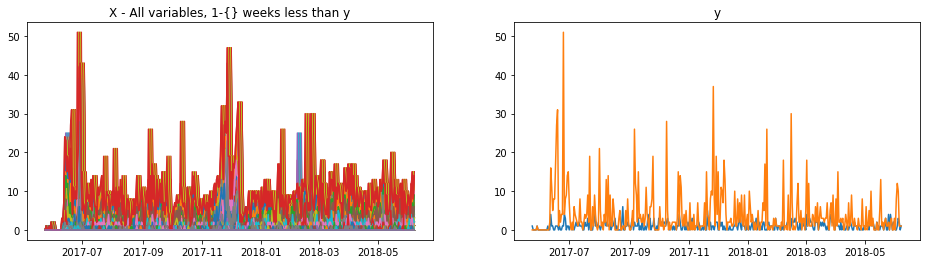

train score: 0.113417641606
test score: -0.00657691634741
R2 score: -0.00657691634741
explained variance 0.0244033482192
confusion matrix
 [0 0 0]


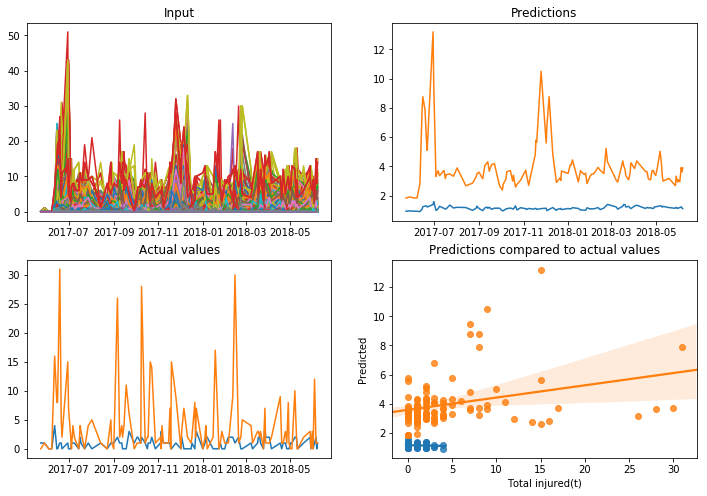

In [18]:
#Train and test a model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import check_cv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.multioutput import MultiOutputRegressor
#from sklearn.metrics import balanced_accuracy_score

#create imputer for nan values 
imp = Imputer(missing_values='NaN', strategy = 'mean')

def plot_model(X_test, y_test, y_pred):
    sync = pd.DataFrame(y_pred, index=y_test.index) #index=y_test.index)
    #print(sync.head())    
        
    f, (ax0, ax1) = plt.subplots(2,2, figsize=(12,8))
    ax0[0].plot(X_test.sort_index())
    ax0[0].set_title('Input')
    ax0[1].plot(sync.sort_index())
    ax0[1].set_title('Predictions')
    ax1[0].plot(y_test.sort_index())
    ax1[0].set_title('Actual values')
    
    for var in range(y_test.shape[1]):
        sns.regplot(y_test.iloc[:,var], sync.iloc[:,var], ax=ax1[1])
    ax1[1].set_title('Predictions compared to actual values')
    ax1[1].set_ylabel('Predicted')
    ax1[0].legend()
    plt.show()

    
def test_model(X_train, X_test, y_train, model):
    #fit the model to the training set
    model.fit(X_train, y_train)

    #predict outcomes beased on training set
    y_pred = model.predict(X_test)
    
    return y_pred, model

def score_model(X_train, X_test, y_train, y_test, y_pred, model):
    
    #score model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    r_2 = r2_score(y_test.astype(float), y_pred.astype(float)) #
    ev = explained_variance_score(y_test.astype(float), y_pred.astype(float))    
    try:
        cm = confusion_matrix(y_test, y_pred)
        #bal_acur = balanced_accuracy_score(y_test, y_pred)
        #to handle linear models, will just score with r_2
    except:
        cm = np.array([0,0,0])     
    
    return train_score, test_score, r_2, ev, cm, 

    
#create fuction to train model and find a variable than can be predicted from the previous week's data
def try_model(X, y, model, verbose=0):


    #Split X and Y into training and testing sets... #we'll use this years data as the hold out set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, shuffle=True)
    #print(y_test.head())
    
    #use function above to train model and create predictions
    y_pred, model = test_model(X_train, X_test, y_train, model)
    
    #use function above to score the model based on predictions
    train_score, test_score, r_2, ev, cm,  = score_model(X_train, X_test, y_train, y_test, y_pred, model)
    
    #extract log probabilites(may have to change this to coef and interpret everything as a linear model)
    #eye = np.eye(X_test.shape[1])
    #params = pd.DataFrame(model.get_params)# index = X.columns)
    
    #check if the true negatives and true positives are at least as big as the false negatives and false positives
    #let's not crossvalidate, the sample size is too small anyway/
    #cv_done = False
    #cv_score = np.array([0,0,0])
    #if cm.shape == (2,2):
    #        TN = cm[0][0]
    #        TP = cm[1][1]
    #        FN = cm[1][0]
    #        FP = cm[0][1]
    #        precision = TP/(TP+FP)
    #        recall = TP/(TP+FN)
    #        if precision > .6 and recall > .6:
                #checked_cv = check_cv(X, y, classifier = True)
    #            cv_score = checked_cv(model, X, y)
                #cv_score = cross_val_score(model, X, y, cv=3)
    #            cv_done = True
    #else:
        #r_2 = r2_score(y_test.values, y_pred)
        #if ev > 0:
            #checked_cv = check_cv(X.astype(float), y.astype(float))
            #cv_score = cross_val_score(model, X.astype(float), y.astype(float), cv=3, scoring='explained_variance')  #checked_cv(model, X.astype(float), y.astype(float), scoring = 'explained variance')
            
            #cv_done = True
    
    if verbose > 0:
        #print scores
        print('train score:', train_score )
        print('test score:', test_score)
        print('R2 score:', r_2)
        print('explained variance', ev)
        print('confusion matrix\n',cm)#n,p\nn', cm[0],'\np',cm[1])
        #if cv_done == True:
        #    print('crossvalidation mean:',cv_score.mean(), cv_score)
        #else:
        #    print('Initial test score not promissing. No crossvalidation')
        #print('Top Feature Probabilities:', log_proba.sort_values(1, axis=1, ascending=False))
        #print('Bottom Feature Probabilities:', bottom_prob)
    
    if verbose > 1:
        #Plot what these look like
        plot_model(X_test, y_test, y_pred)
       
    return train_score, test_score, r_2, ev#, coef

#define y
y = y_day.loc[:,['Total killed(t)','Total injured(t)']] # > in_week.loc[:,'Total killed'].quantile(.5)      

#Plot what X and y look like
f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(X_day)
ax1.set_title('X - All variables, 1-{} weeks less than y')#.format(int(lookback)))
ax2.plot(y)
ax2.set_title('y')
plt.show()

#give the function to try the model a dry run
dry_run = try_model(X_day, y, MultiOutputRegressor(BayesianRidge(), n_jobs=20), verbose = 2)


train score: 0.873192960991
test score: -0.807676147596
R2 score: -0.807676147596
explained variance -0.559057443264
confusion matrix
 [0 0 0]


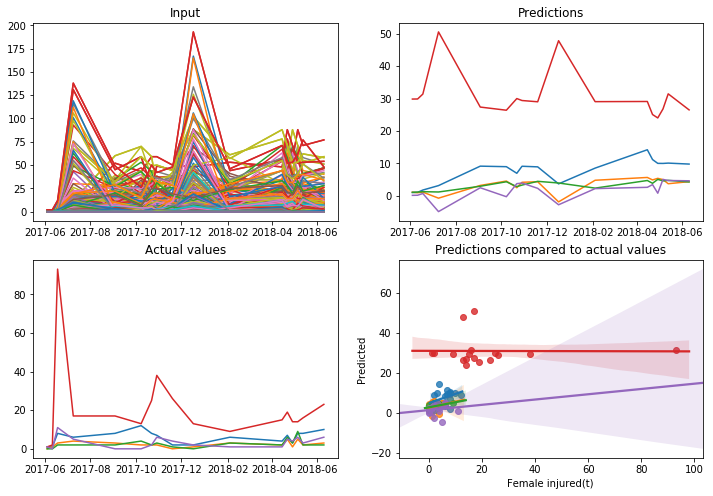

train score: 0.583135726305
test score: -0.124526971397
R2 score: -0.124526971397
explained variance -0.0041303678873
confusion matrix
 [0 0 0]


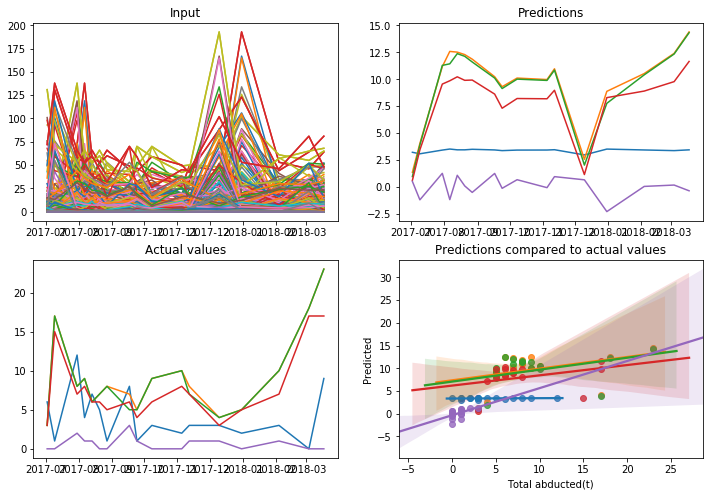

train score: 0.627155406363
test score: -5.43607060006
R2 score: -5.43607060006
explained variance -4.73315946833
confusion matrix
 [0 0 0]


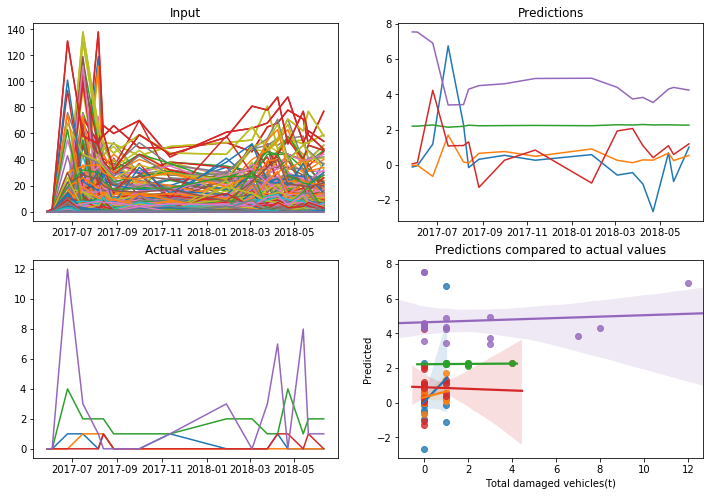

train score: 0.999999999997
test score: -0.627107443171
R2 score: -0.627107443171
explained variance -0.428452386736
confusion matrix
 [0 0 0]


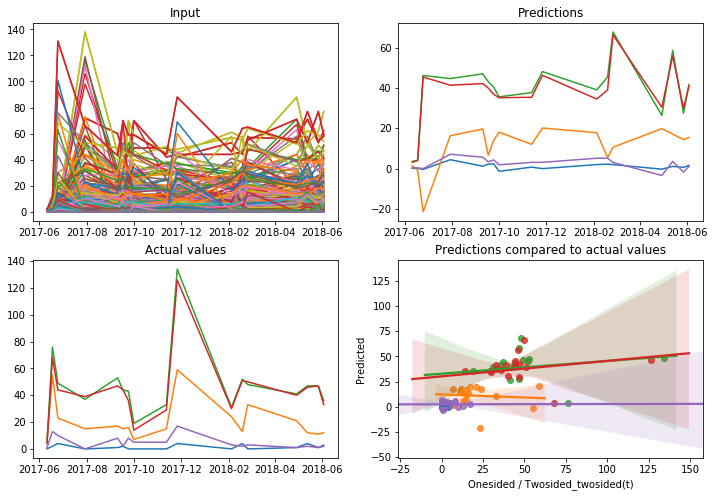

train score: 0.708520513556
test score: -0.624690236272
R2 score: -0.624690236272
explained variance -0.588516457958
confusion matrix
 [0 0 0]


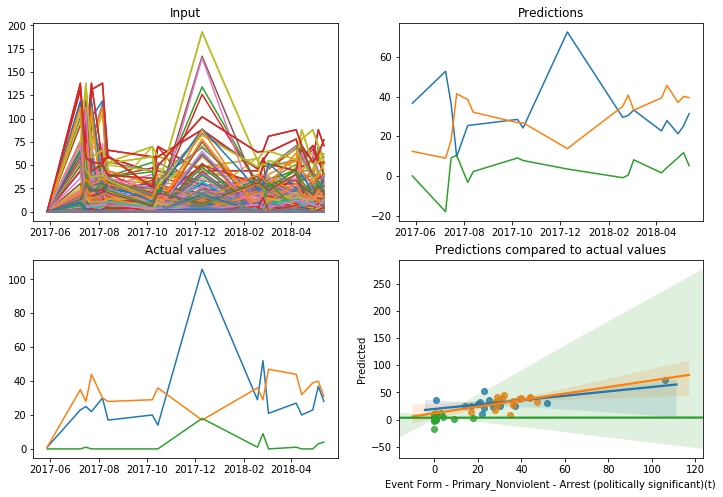

train score: 0.306128099277
test score: -0.135363903281
R2 score: -0.135363903281
explained variance -0.0522777673914
confusion matrix
 [0 0 0]


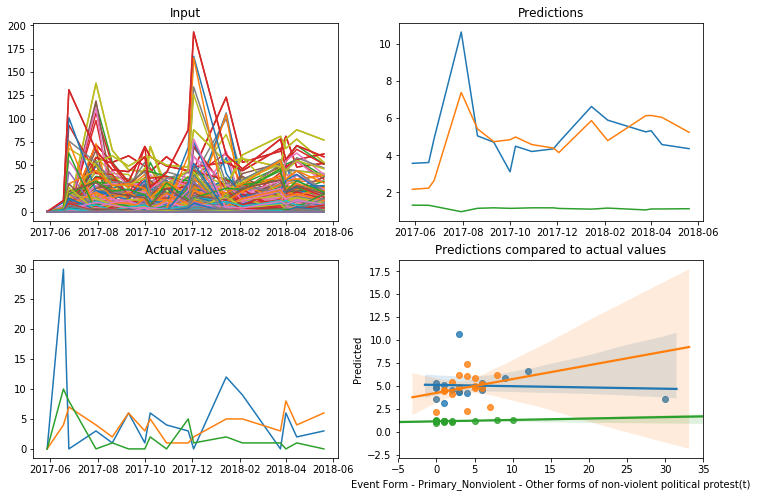

train score: 0.563440945525
test score: -0.324381125755
R2 score: -0.324381125755
explained variance -0.260294615102
confusion matrix
 [0 0 0]


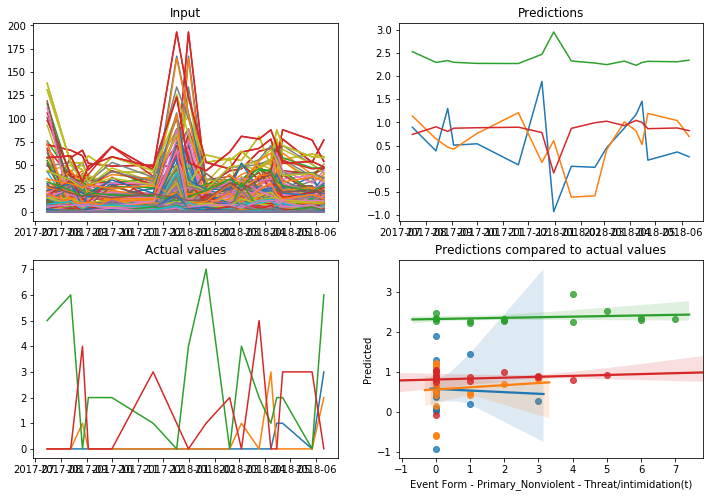

train score: 0.999737406459
test score: -1.65186136108
R2 score: -1.65186136108
explained variance -1.1739047934
confusion matrix
 [0 0 0]


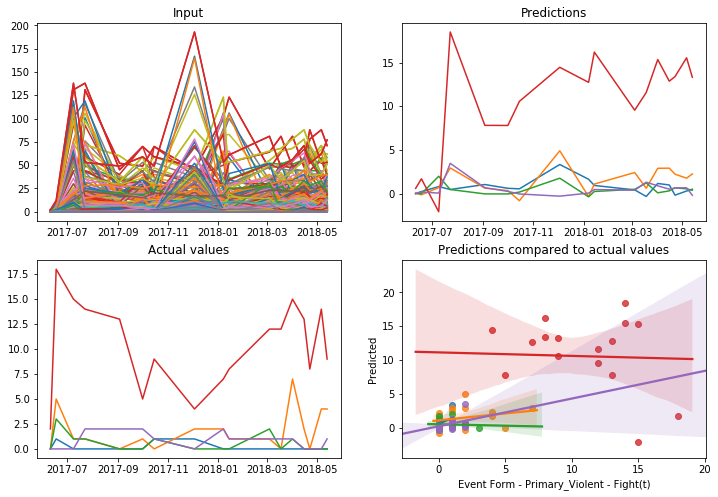

train score: 0.643279878204
test score: -0.879825573748
R2 score: -0.879825573748
explained variance -0.33749306808
confusion matrix
 [0 0 0]


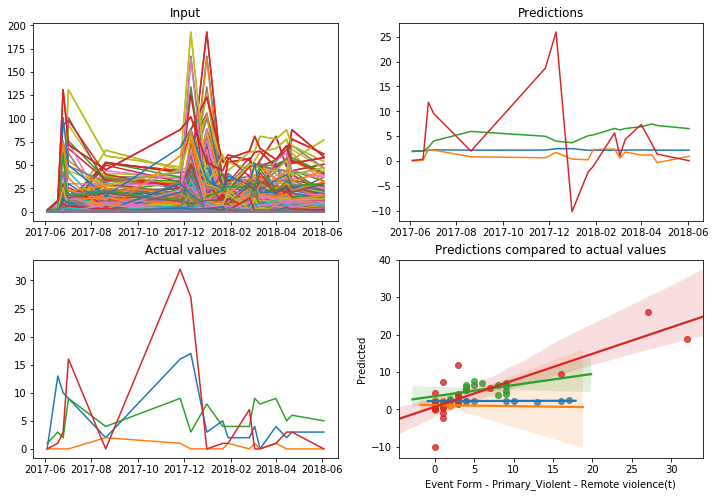

train score: 0.828327782384
test score: 0.225030622335
R2 score: 0.225030622335
explained variance 0.25688582372
confusion matrix
 [0 0 0]


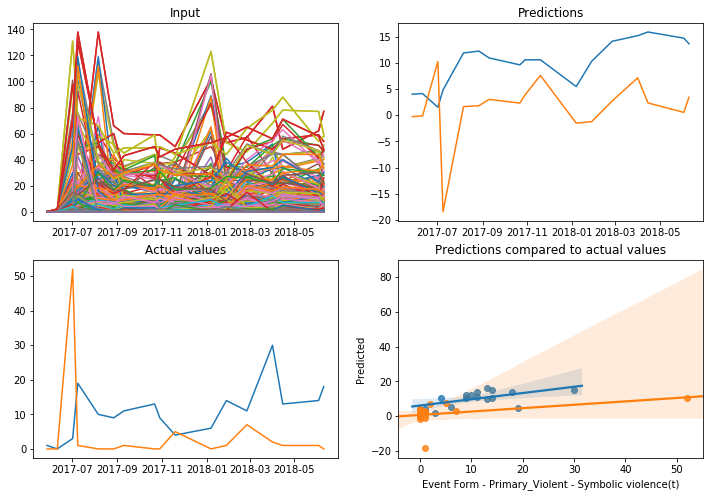

train score: 0.591561792008
test score: -2.32845988586
R2 score: -2.32845988586
explained variance -0.896455163363
confusion matrix
 [0 0 0]


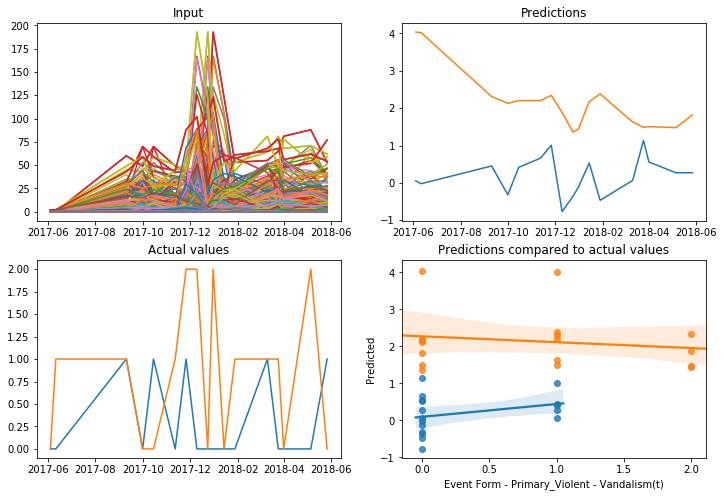

train score: 0.999999999486
test score: -1.36339083578
R2 score: -1.36339083578
explained variance -1.10358714704
confusion matrix
 [0 0 0]


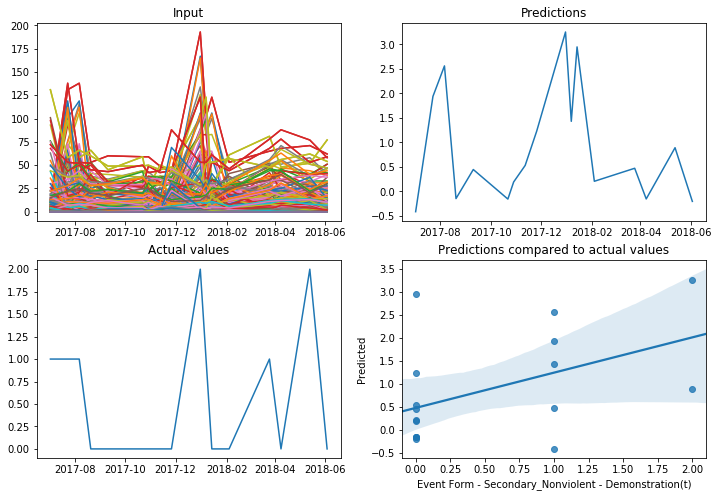

train score: 1.0
test score: -2.44159151921
R2 score: -2.44159151921
explained variance -2.3218578214
confusion matrix
 [0 0 0]


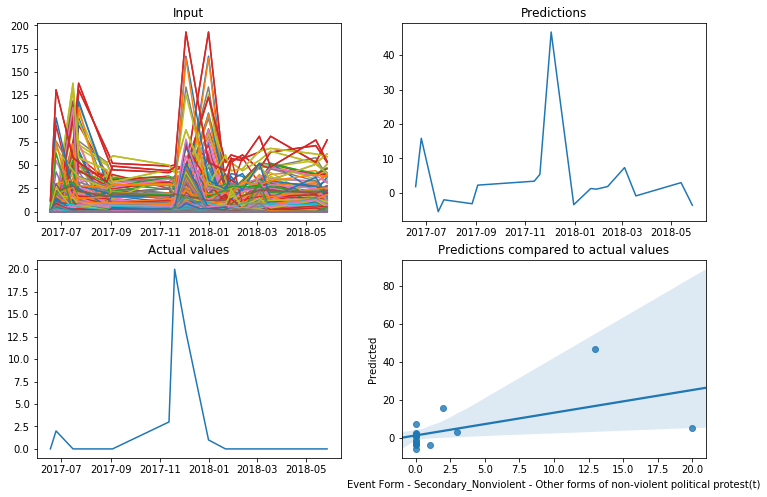

train score: 0.567447676557
test score: -9.69422228817
R2 score: -9.69422228817
explained variance -1.20882055594
confusion matrix
 [0 0 0]


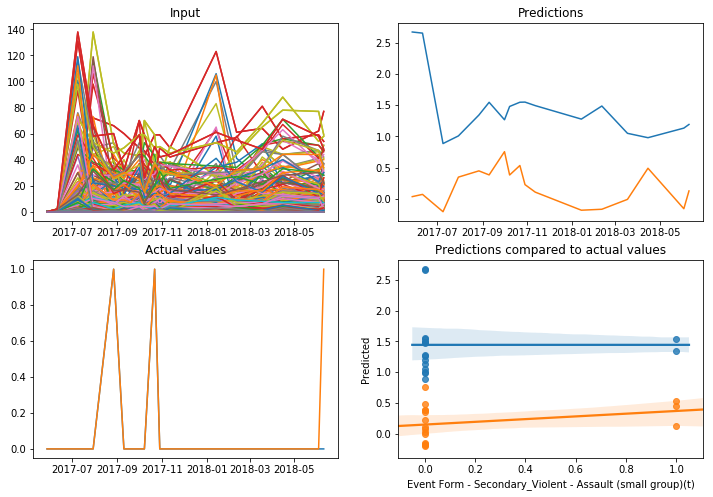

train score: 0.999999998666
test score: -13.1294106507
R2 score: -13.1294106507
explained variance -12.1963452163
confusion matrix
 [0 0 0]


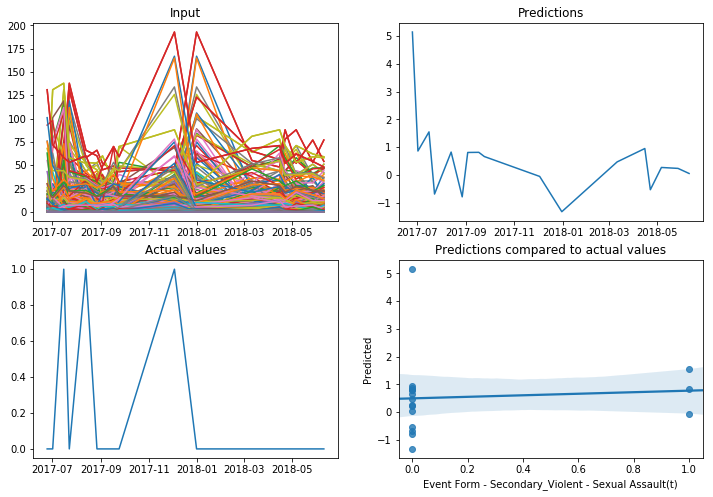

train score: 0.349834057461
test score: -10.8435880184
R2 score: -10.8435880184
explained variance -10.691870477
confusion matrix
 [0 0 0]


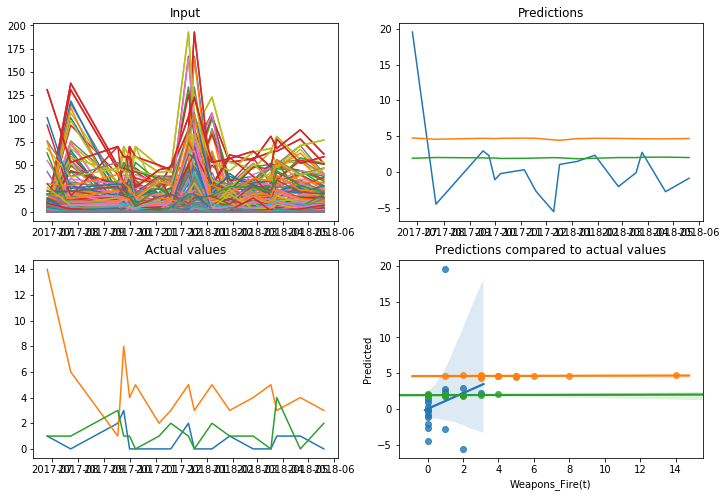

train score: 0.551648122649
test score: -0.738351641999
R2 score: -0.738351641999
explained variance -0.588008565056
confusion matrix
 [0 0 0]


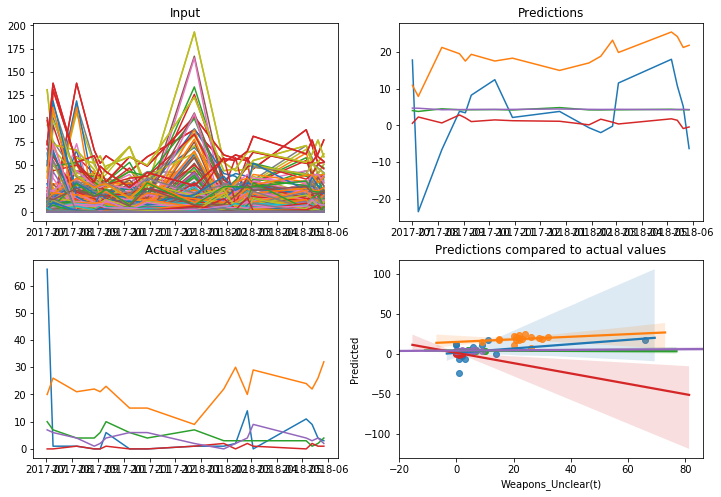

train score: 0.999999999488
test score: -0.795977139144
R2 score: -0.795977139144
explained variance -0.407563906721
confusion matrix
 [0 0 0]


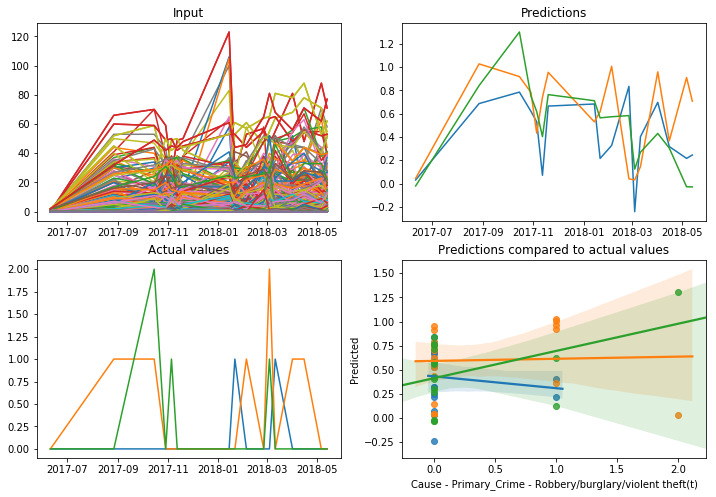

train score: 0.999999999949
test score: -10.0552424598
R2 score: -10.0552424598
explained variance -8.75713923673
confusion matrix
 [0 0 0]


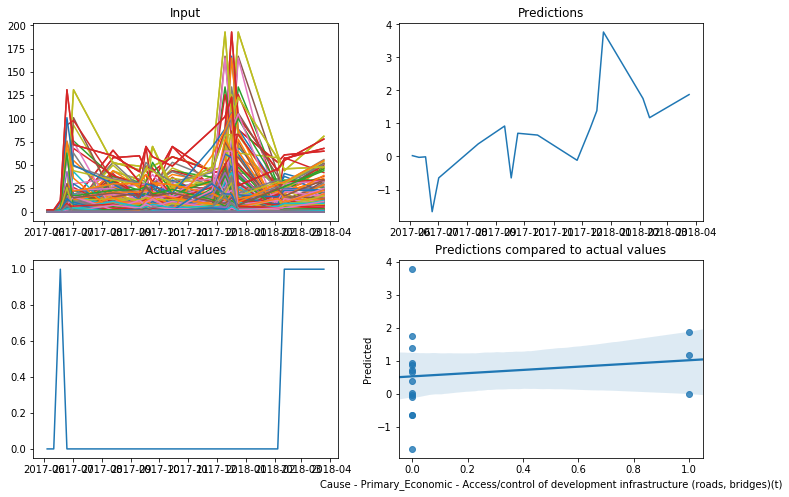

train score: 0.999999999985
test score: -0.817338821646
R2 score: -0.817338821646
explained variance -0.732040799903
confusion matrix
 [0 0 0]


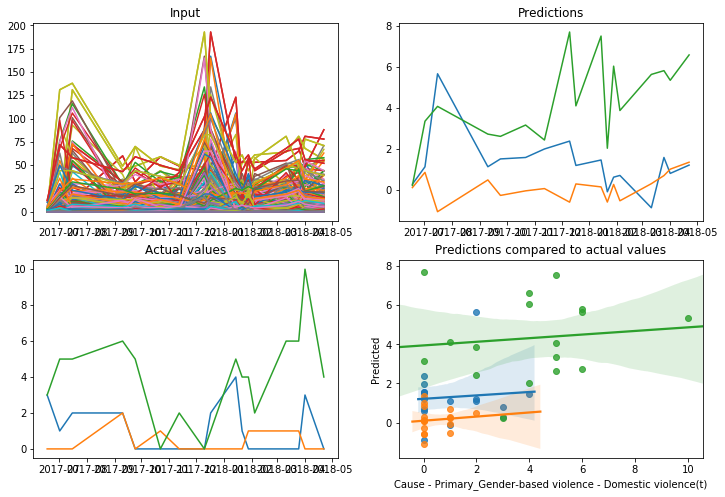

train score: 0.894795212844
test score: -9.97018919308
R2 score: -9.97018919308
explained variance -9.0608456508
confusion matrix
 [0 0 0]


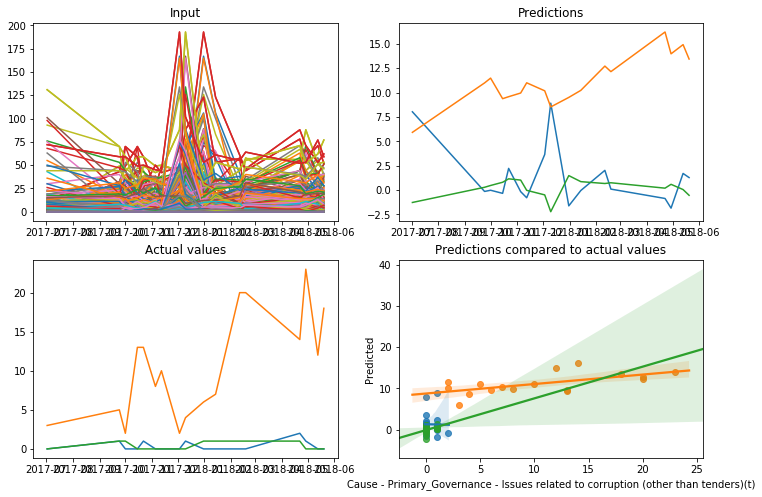

train score: 0.723309369126
test score: -1.08220701467
R2 score: -1.08220701467
explained variance -0.958809702678
confusion matrix
 [0 0 0]


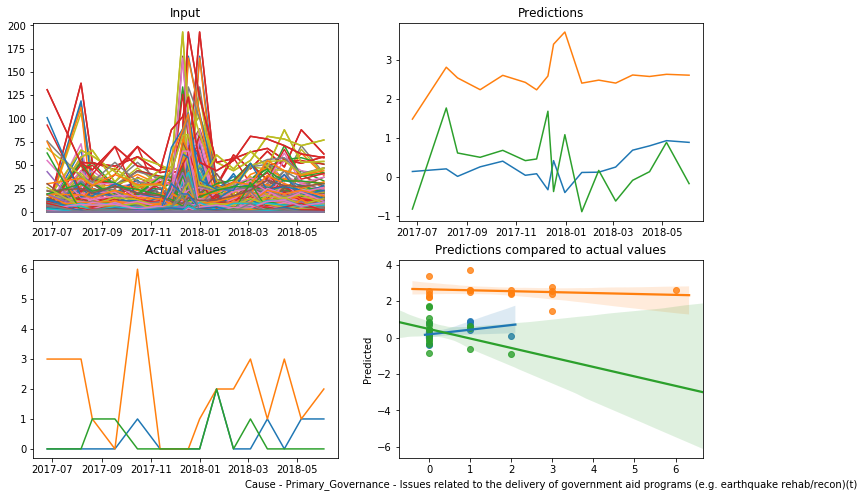

train score: 0.999999999999
test score: -0.389626731387
R2 score: -0.389626731387
explained variance -0.35595641855
confusion matrix
 [0 0 0]


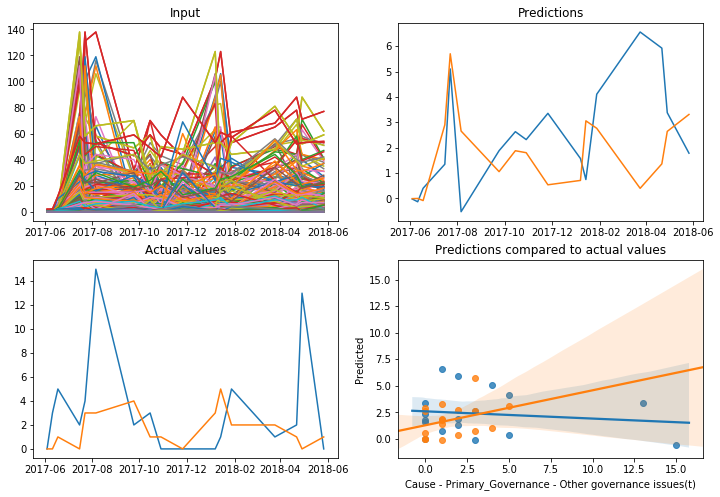

train score: 0.999999999782
test score: -2.59597101432
R2 score: -2.59597101432
explained variance -2.11663079734
confusion matrix
 [0 0 0]


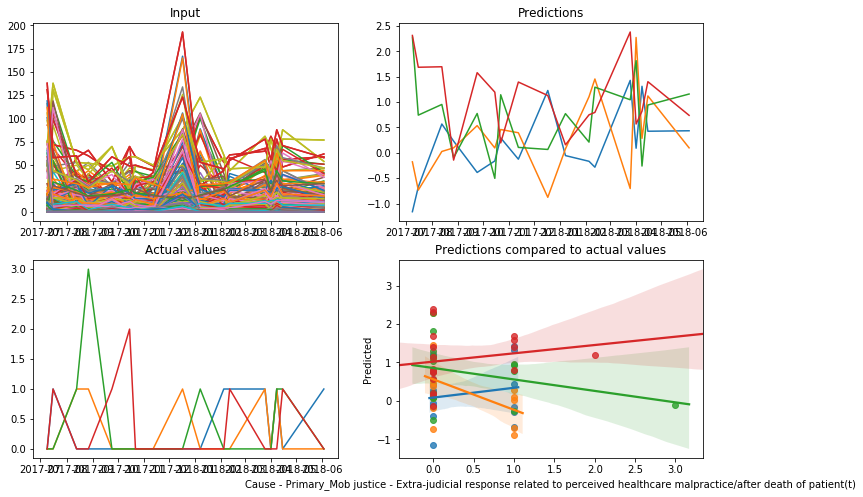

train score: 0.999999999913
test score: -0.370613744982
R2 score: -0.370613744982
explained variance -0.350005281984
confusion matrix
 [0 0 0]


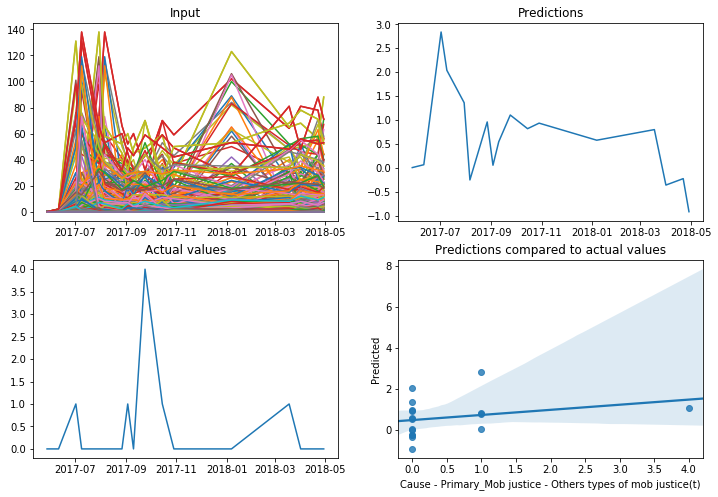

train score: 0.785545836879
test score: -0.216600062961
R2 score: -0.216600062961
explained variance -0.152242151112
confusion matrix
 [0 0 0]


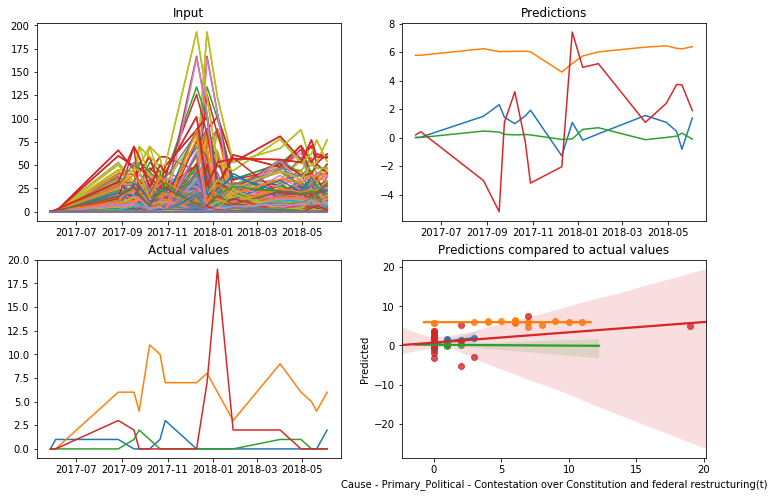

train score: 0.206010472947
test score: -0.00644956964449
R2 score: -0.00644956964449
explained variance 0.132144351073
confusion matrix
 [0 0 0]


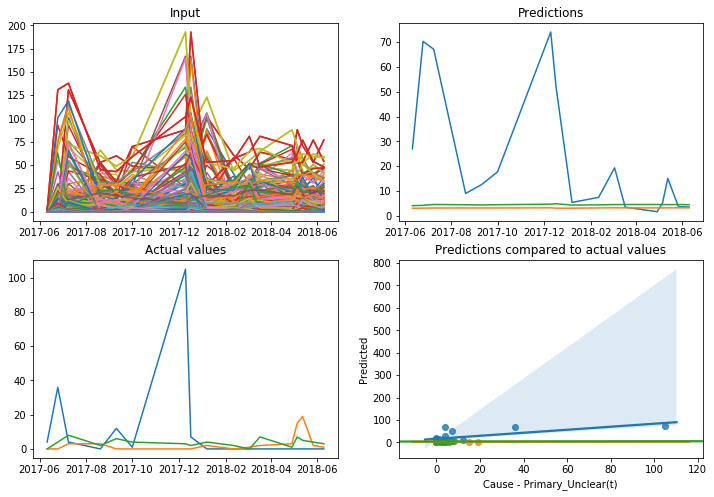

train score: 0.999999999932
test score: -4.23788953056
R2 score: -4.23788953056
explained variance -4.22167496973
confusion matrix
 [0 0 0]


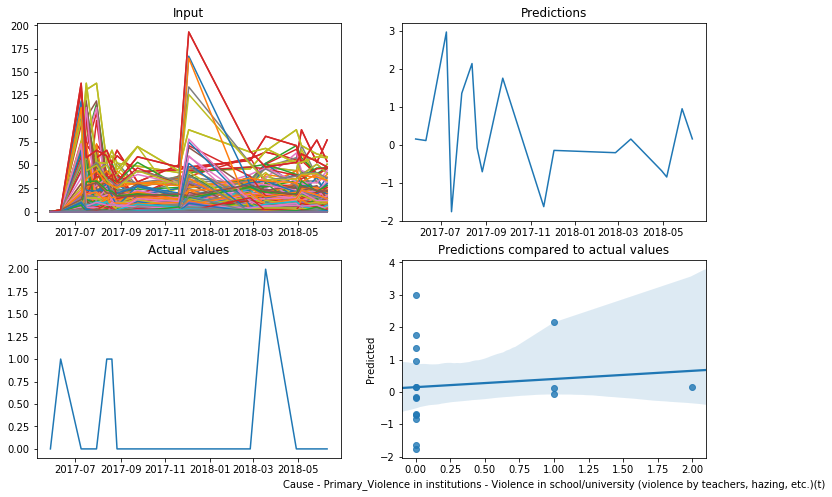

ValueError: Found array with 0 feature(s) (shape=(38, 0)) while a minimum of 1 is required.

In [19]:
#find which variables have the best crossvalidation scores
def find_var (X, df, model, n_true, verbose=False):
    scores = pd.DataFrame(index=df.columns, columns=['train_score', 'test_score','r_2','explained_variance','pc_true'])
    #for var in df.columns:
    #y = df# > df[var].quantile(.5)
    #X = time_shift.loc[:,'var1(t-1)':'var340(t-1)']
    #n_class = y.nunique()
    #n_bins = 10
    #n_true = 10
    pc_true = [sum(df[x] >= 1)/len(df[x])*100 > n_true for x in df.columns]
    #flt = 
    y = df.loc[:,pc_true] #make it a percentage
        #if verbose == True:
         #   print('\n')
          #  print(var)
        #if verbose == False:
         #       print('.', end='')
        
      
    train_score, test_score, r_2, ev = try_model(X, y, model, verbose = verbose)
            
     #scores.loc[var,'cv_mean'] = cv_score.mean()
    scores.loc[:,'train_score'] = train_score
    scores.loc[:,'test_score'] = test_score
    scores.loc[:,'pc_true'] = pc_true   
    scores.loc[:,'r_2'] = r_2
    scores.loc[:,'explained_variance'] = ev
            #scores.loc[var,'confusion_matrix'] = cm
            #print(scores[var])
    
    #print('bing!')
    
    return scores
for step in range(5,y_week.shape[1])[::5]:
    scores = find_var(X_week, y_week.iloc[:,step-5:step], MultiOutputRegressor(BayesianRidge(), n_jobs=step), n_true=20, verbose=2)
#scores
#top10 = scores.sort_values('cv_mean', ascending=False)[:10]
#top10

In [13]:
def interpet_prob(log_proba):
    pd.set_option('display.max_colwidth', 200)
    print(np.exp(log_proba).sort_values(0)[:2])
    print(np.exp(log_proba).sort_values(1)[:2])
    sns.heatmap(np.exp(log_proba).sort_values(1))
    plt.show()

def investigate(cats, X_train, y_train, holdout_X, holdout_y, model, verbose=1):
    #function to look futher into better performing results
    holdout_scores = pd.DataFrame(index=cats, columns=['train_score','test_score', 'r_2', 'explained_variance'])
    for cat in cats:
        y = y_train[cat]# > y_train[cat].quantile(.5)
        if verbose > 0:
            print('\n',cat)
            train_score, test_score, r_2, ev = try_model(X_train, y, model, verbose = 0)
            #interpet_prob(coef)
        
        h_y = holdout_y[cat]# > holdout_y[cat].quantile(.5)
        y_pred, model = test_model(X_train, holdout_X, y, model)
        train_score, test_score, r_2, ev, cm = score_model(X_train, holdout_X, y, h_y, y_pred, model)
        #scores = score_model(X_train, holdout_X, y, h_y, y_pred, model)
        #holdout_scores.loc[cat,['train_score', 'test_score', 'confusion_matrix', 'r_2']] = scores
        holdout_scores.loc[cat,'train_score'] = train_score
        holdout_scores.loc[cat,'test_score'] = test_score
        #holdout_scores.loc[cat,'confusion_matrix'] = cm
        holdout_scores.loc[cat,'r_2'] = r_2
        holdout_scores.loc[cat,'explained_variance'] = ev
    return holdout_scores

In [14]:
#create function to optimize lookback!

def opt_lookback(df, model):
    '''function to optimize number of units to look back through time'''
    print('Optimizing...')
    scorelist = []
    categories = df.columns.tolist()
    scoredf = pd.DataFrame(index=categories)#need to 
    #loop through possible ranges to look back at to find the the optimum value
    for lookback in (range(1,50)):
        #create a timeshifted dataframe within that range
        time_shift = make_timeshift(df, lookback)
        
        #split timeshift into training and hold out data sets
        X, y, holdout_X, holdout_y = create_X_y(time_shift)
        
        #bandaid fix
        scoredf.index = y.columns.tolist()
        
        #find the scores for all the variables #(those which have more positives than negatives)
        scores = find_var(X, y, model, n_true=50, verbose=0)
        
        #print(scores.head())
        #find the sum of the crossvalidation scores
        #test = np.sum(scores['cv_mean'])
        
        
        #find which variables recieved a score above 0
        top_scores = scores.loc[scores['explained_variance'] > 0].index.tolist()
        #print(top_scores)
        
        #find sum of scores above 0
        top_sum = np.sum(scores.loc[top_scores,'explained_variance'])
        
        #use investigate function to see how those variables did against the holdout set
        holdout_scores = investigate(top_scores, X, y, holdout_X, holdout_y, model, verbose=0)             
        #print(holdout_scores.head())
        
        #find the sum of the hold out test scores scores
        holdout_max = np.max(holdout_scores.loc[:,'test_score'])
        #print(holdout_sum)
        
        #print the lookback interval, and mean scores
        print('\nt-{0} top sum: {1:.2f}, holdout_max: {2:.2f} '.format(lookback,top_sum, holdout_max))
        
        #append the crossvalidation score to the list
        scorelist.append(top_sum)#(cv_score)
        
        #join the scores to the data frame of scores
        scoredf = scoredf.join(scores, how='left', sort=False, rsuffix=('(t-'+str(lookback).zfill(3)+')'))
        scoredf = scoredf.join(holdout_scores, how='left', sort=False, rsuffix='_holdout(t-'+str(lookback).zfill(3)+')')
        #scoredf = pd.concat([scoredf, scores, holdout_scores], axis=1, join_axes=[scoredf.index])
        
        if len(scorelist) > 10:
            if np.median(scorelist[-5:]) < np.median(scorelist[-10:-5]):
                return scoredf

from sklearn.linear_model import Lasso
#scoredf_day = opt_lookback(in_day, BayesianRidge())
scoredf_week = opt_lookback(in_week, MultiOutputRegressor(BayesianRidge()))
print('bing!')

scoredf_week.head()
#plt.plot(scoredf_day)#, label = 'by day')
#plt.plot(scoredf_week, label = 'by week')
#plt.title('Mean crossvalidation scores v. lookback times')
#plt.legend()
#plt.show()

Optimizing...

t-1 top sum: 0.00, holdout_max: nan 

t-2 top sum: 0.00, holdout_max: nan 

t-3 top sum: 0.00, holdout_max: nan 

t-4 top sum: 0.00, holdout_max: nan 

t-5 top sum: 0.00, holdout_max: nan 

t-6 top sum: 0.00, holdout_max: nan 

t-7 top sum: 0.00, holdout_max: nan 

t-8 top sum: 0.00, holdout_max: nan 

t-9 top sum: 0.00, holdout_max: nan 

t-10 top sum: 0.00, holdout_max: nan 

t-11 top sum: 0.00, holdout_max: nan 

t-12 top sum: 0.00, holdout_max: nan 


KeyboardInterrupt: 

In [ ]:
scoredf_week.head() #0,1,2,3,5,6,7,8,9 < - variables to plot

In [ ]:
#scoredf_week['cv_mean'].sum()
scoredf_week.iloc[:,1::9]

week


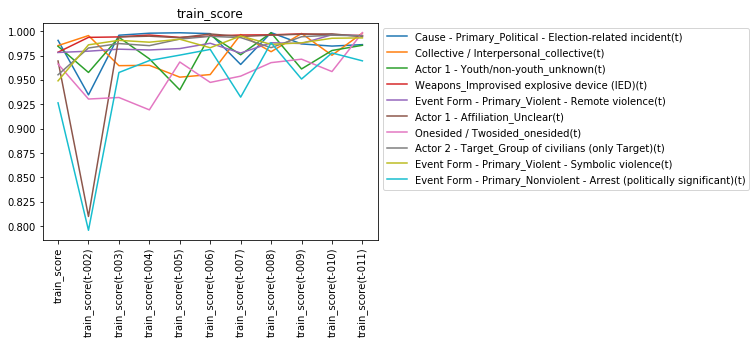

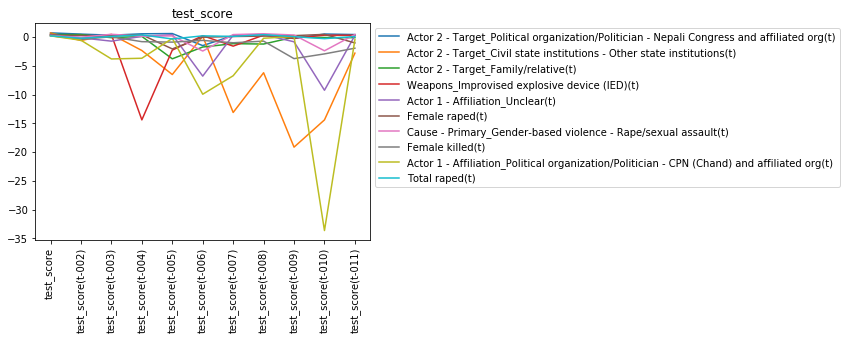

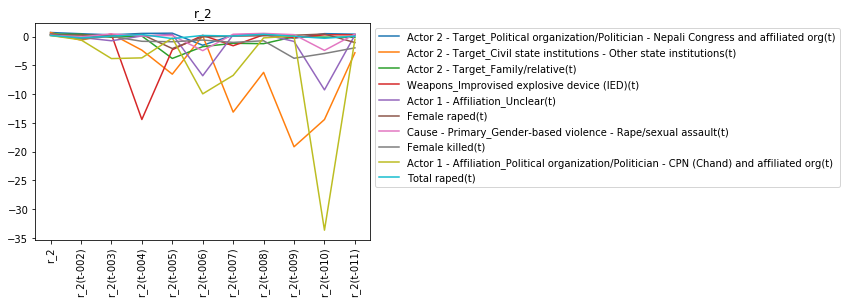

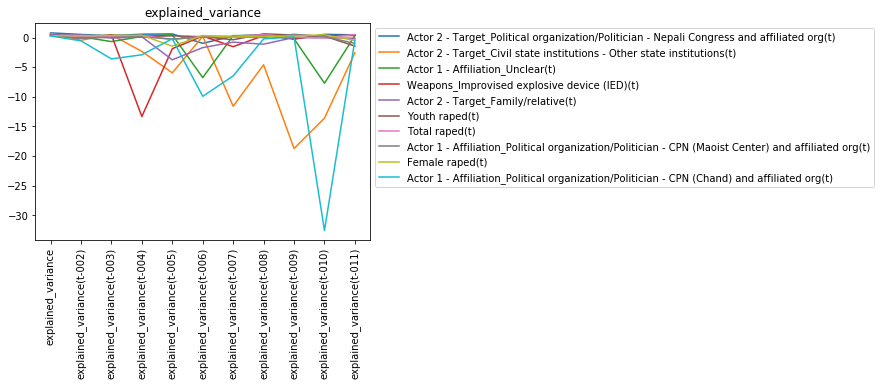

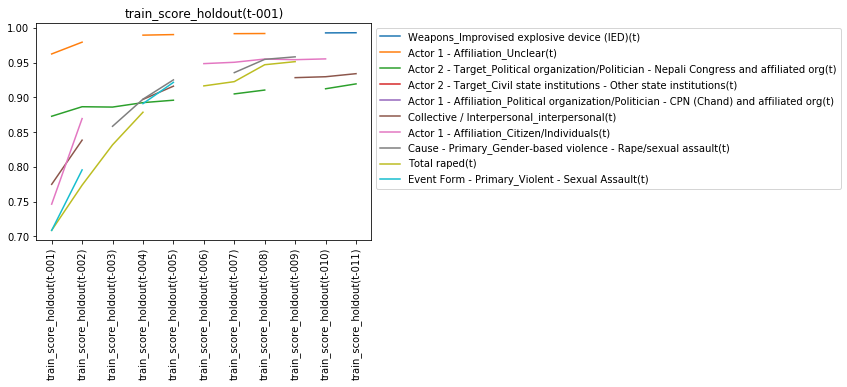

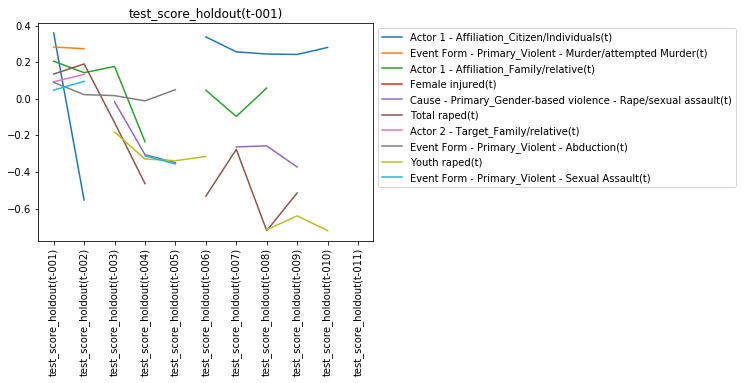

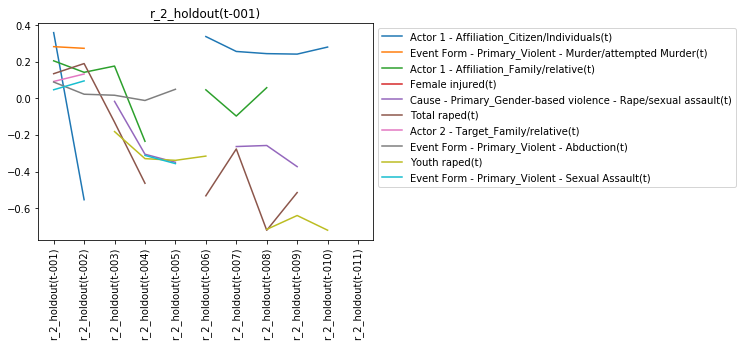

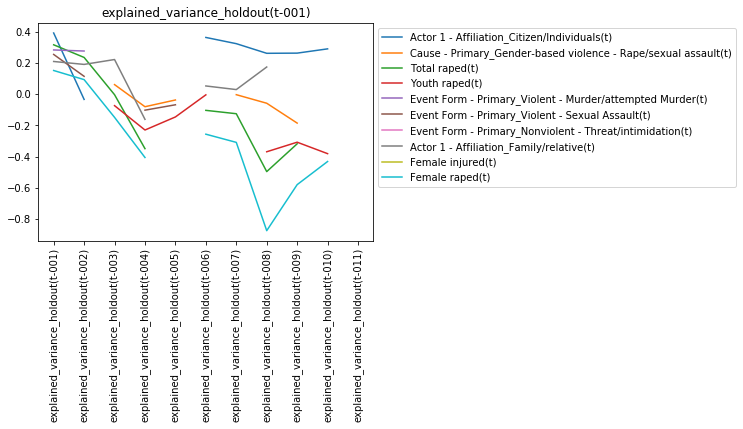

In [44]:
def plot_frame(df, start):
    plotvar = df.iloc[:,start::9].sort_values(df.columns[start::9].tolist(), axis=0, ascending=False)[:10]
    #sortvar = plotvar.sort_index(axis=1, ascending=False)
    for label in plotvar.index:
        plt.plot(plotvar.loc[label,:], label=label)

    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1,1))
    plt.title(plotvar.columns[0])
    plt.show()
    #print(plotvar)

#print('day')
#for start in [0,1,3,5,7]:
    #plot_frame(scoredf_day, start)

print('week')
for start in [0,1,2,3,5,6,7,8]:
    plot_frame(scoredf_week, start)
    


In [ ]:
scoredf_week.sort_values('test_score_holdout(t-009)', ascending=False)

In [ ]:
#plt.plot(scorelist_day, label = 'by day')
#plt.plot(scorelist_week, label = 'by week')
#plt.title('Mean crossvalidation scores v. lookback times')
#plt.legend()
#plt.show()
#scoredf_day
#plt.plot()

#plt.show()
#scoredf_day.loc[:,::4]
plt.plot(scoredf_day.iloc[:,0::7].sort_values('cv_mean(t-3)')[:10], marker='.', linestyle='none')
plt.xticks(rotation=90)
plt.show()

Note effectiveness of MultinomialNB() at predicting demonstrations and sit ins / collective violence based on indicators from the previous weeks. Indicators that ... and testing on the hold out set of this years data.

Perhaps proceed with dialing in collective violence. 

In [ ]:
#Dial in communal violence predictions


In [ ]:
cv_scores_day = find_var(X_day, in_day, MultinomialNB(), n_true=20, verbose=False)
top10_day = cv_scores_day.sort_values('cv_mean', ascending=False)[:10]
top10_day

In [ ]:
for cat in top10_day.index:
    print('\n',cat)
    y = in_day[cat] > 1
    cv_score, test_score, cm, log_proba = try_model(X_day, y, MultinomialNB(), verbose = 0)
    if cv_score.mean() > .70:
        try_model(X_day, y, MultinomialNB(), verbose = 2)
        interpet_prob(log_proba)

In [193]:
from sklearn.naive_bayes import BernoulliNB

BNB_scores = find_var(X, in_week, BernoulliNB(), n_true=20, verbose=False)
BNB_top10 = BNB_scores.sort_values('cv_mean', ascending=False)[:10]
BNB_top10

scoreBNBdf_week = opt_lookback(in_week, MultinomialNB())

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . bing!


cv_mean test_score   confusion_matrix  pc_true
Crosscutting issues_Constitutional Process,Local Body Restructuring                                              0.830065      0.875  [[10, 1], [1, 4]]  22.6415
Target - if one-sided violence_Group of civilians (only Target) (1701)                                           0.755991     0.9375  [[14, 0], [1, 1]]  20.7547
Actor 1 - Perpetrator Type_Political organization/Politician - CPN (Chand) and affiliated org (0404)             0.755418     0.9375  [[12, 1], [0, 3]]  24.5283
Election-related specific cause secondary_Constestation regarding implementation and legitimacy of election      0.754902      0.875  [[13, 0], [2, 1]]  22.6415
Crosscutting issues_Elections,Constitutional Process                                                             0.736383     0.9375  [[12, 0], [1, 3]]  22.6415
Cause - secondary_ ()                                                                                        7.90505e-323     0.6875  [[11, 0], [5, 0]]  24.5283
Actor 1 - Perpetrator Type_Criminal (1401)                                                                   7.90505e-323       0.75  [[12, 0], [4, 0]]  24.5283
Actor 1 - Perpetrator Type_Citizen/Individuals (2001)                                                        7.90505e-323     0.8125  [[13, 0], [3, 0]]  20.7547
Crosscutting issues_GBV                                                                                      7.90505e-323      0.875  [[14, 0], [2, 0]]  20.7547
Crosscutting issues_Elections                                                                                7.90505e-323     0.8125  [[13, 0], [3, 0]]  24.5283

In [60]:
scoreBNBdf_week = opt_lookback(in_week, MultinomialNB())

Optimizing...
..................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


..................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


........................................................................................................................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


.................................................................................................................................................................
t-1 mean_cv sum: 10.54, holdout_mean sum: 2.57 
.................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


............................................................................................................................................................................................................................................................................................................................................
t-2 mean_cv sum: 7.32, holdout_mean sum: 2.96 
...............

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...........................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...................................................................................................................................................................................................................................................................................................................
t-3 mean_cv sum: 8.78, holdout_mean sum: 3.04 
.........................................................................................................................................................................................................................................................................................................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


....................................
t-4 mean_cv sum: 9.80, holdout_mean sum: 4.26 
..................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...........................................................................................................................................................................................................................................................................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars



t-5 mean_cv sum: 6.99, holdout_mean sum: 2.17 
..............................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


............................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...................................................................................................................................................................................................................................................................
t-6 mean_cv sum: 6.20, holdout_mean sum: 1.13 
...............

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in long_scalars


............................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


..........................................................................................................................................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


........................................................................................................................................................
t-7 mean_cv sum: 11.80, holdout_mean sum: 4.61 
......................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in long_scalars


........................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...............................................................................................................................................................................................................................................................................
t-8 mean_cv sum: 10.08, holdout_mean sum: 4.04 
..................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...................................................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


.................................................................................................................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


.......................................................................................
t-9 mean_cv sum: 8.26, holdout_mean sum: 2.91 
.............................................................................................................................................................................................................................................................................................................................................................................................
t-10 mean_cv sum: 8.87, holdout_mean sum: 4.09 
.................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


.................................................................................................................................................................................................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...........................................................................................................
t-11 mean_cv sum: 6.16, holdout_mean sum: 4.26 
..........................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


...................................................................................................................................................................................................................................................................................................................
t-12 mean_cv sum: 9.18, holdout_mean sum: 4.13 
.................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in long_scalars


..................................................................

/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in long_scalars


..........................................................................................................................................................................................................................................................................................
t-13 mean_cv sum: 5.82, holdout_mean sum: 1.83 


In [228]:
for cat in BNB_top10.index[:5]:
    print('\n',cat)
    y = in_week[cat] > in_week[cat].quantile(.75)
    cv_score, test_score, cm, log_proba = try_model(X, y, BernoulliNB(), verbose = 0)
    if cv_score.mean() > .70:
        try_model(X, y, BernoulliNB(), verbose = 2)
        interpet_prob(log_proba)


 Crosscutting issues_Constitutional Process,Local Body Restructuring

 Target - if one-sided violence_Group of civilians (only Target) (1701)

 Actor 1 - Perpetrator Type_Political organization/Politician - CPN (Chand) and affiliated org (0404)

 Election-related specific cause secondary_Constestation regarding implementation and legitimacy of election

 Crosscutting issues_Elections,Constitutional Process


In [230]:
for cat in BNB_top10.index[:5]:
    print('\n',cat)
    y = in_day[cat] > 1
    cv_score, test_score, cm, log_proba = try_model(X_day, y, BernoulliNB(), verbose = 0)
    if cv_score.mean() > .70:
        try_model(X, y, BernoulliNB(), verbose = 2)
        interpet_prob(log_proba)


 Crosscutting issues_Constitutional Process,Local Body Restructuring

 Target - if one-sided violence_Group of civilians (only Target) (1701)

 Actor 1 - Perpetrator Type_Political organization/Politician - CPN (Chand) and affiliated org (0404)

 Election-related specific cause secondary_Constestation regarding implementation and legitimacy of election

 Crosscutting issues_Elections,Constitutional Process


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rgs = RandomForestRegressor()
cls = RandomForestClassifier()
#y = 
#try_model(X, y, cls)

In [65]:
clsdf_week = opt_lookback(in_week, rgs)

Optimizing...
.

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_log_proba'

In [ ]:
top6 = cv_scores.sort_values('cv_mean', ascending=False)[:6]
top6

In [ ]:
s2 = pd.Series([6,8,3], index=list('abc'))
s4 = pd.Series([1,2,3], index=list('abc'))

s2 + s4